
# ✨ A/B Test Scenarios from my Sleep Cycle Dataset

Understanding what affects sleep is more than just tracking hours — it's about uncovering **what truly influences rest, movement, and quality**.  
This project explores **five compelling A/B test scenarios** using real-world sleep tracking data.  
Each test isolates one variable — from weather to walking — and examines its measurable effect on sleep outcomes.

---

## 🧪 A/B Test Ideas

---

### 1. 🌡️ *Does Weather Influence Sleep Quality?*
**Hypothesis**  
- **H₀**: No difference in sleep quality between `"No weather"` and known weather types  
- **H₁**: Sleep quality differs when weather conditions are recorded  

**Groups**  
- A = `"No weather"`  
- B = Any known weather condition  

**Metric**  
- `Sleep Quality`

---

### 2. 🏙️ *Do Cities Impact How Much You Move at Night?*
**Hypothesis**  
- **H₀**: City has no effect on nighttime movement  
- **H₁**: Movement varies between cities  

**Groups**  
- A = City A (e.g., Toronto)  
- B = City B (e.g., Dhaka)  

**Metric**  
- `Movements per hour`

---

### 3. 🔁 *Does Regular Sleep Make Falling Asleep Easier?*
**Hypothesis**  
- **H₀**: No difference in time to fall asleep between regular and irregular sleepers  
- **H₁**: Regular sleepers fall asleep faster  

**Groups**  
- A = Regularity < 0.5 (irregular)  
- B = Regularity ≥ 0.5 (regular)  

**Metric**  
- `Time before sleep`

---

### 4. 👣 *Does Walking More Improve Sleep Quality?*
**Hypothesis**  
- **H₀**: Step count has no effect on sleep quality  
- **H₁**: People who walk more sleep better  

**Groups**  
- A = Steps < median  
- B = Steps ≥ median  

**Metric**  
- `Sleep Quality`

---

### 5. ❄️ *Do Colder Nights Keep You in Bed Longer?*
**Hypothesis**  
- **H₀**: Temperature has no impact on time spent in bed  
- **H₁**: People stay in bed longer when it’s cold  

**Groups**  
- A = Temperature < 50°F  
- B = Temperature ≥ 50°F  

**Metric**  
- `Time in bed`

---

> 💡 Each test is powered by **statistical rigor** — using t-tests or Mann-Whitney U tests depending on data normality.  
> We’ll explore **p-values, effect sizes**, and draw **actionable insights** on what truly affects sleep.

---


In [8]:
# Loading the core libraries for analysis and visualization
import numpy as np                 # For numerical operations
import pandas as pd                # For working with DataFrames and CSV files
import matplotlib.pyplot as plt    # For plotting
import seaborn as sns              # For more visually appealing statistical plots
from scipy.stats import mannwhitneyu   # To check for Mann-Whitney U test function
from scipy.stats import shapiro        # To check whether data is normally distributed

# Optional: Show all columns when displaying DataFrames (useful for wide datasets like this one)
pd.set_option('display.max_columns', None)

# Import display and Markdown functions from IPython to render styled text output (e.g., colored or formatted Markdown) directly in Jupyter Notebooks
from IPython.display import display, Markdown

### 🎯 1. Objective: Does Weather Data Impact Sleep Quality?

This A/B test explores whether the presence of weather condition data (e.g., clear, rainy, snowy) has any measurable effect on Sleep Quality compared to when no weather condition is recorded ("No weather").

The motivation for this test comes from the hypothesis that environmental conditions, such as rain or extreme temperatures, may influence how well someone sleeps — either physically (e.g., temperature discomfort) or psychologically (e.g., mood, coziness, disruption). However, in some cases, sleep tracking devices may not record weather, marking it as "No weather", possibly due to GPS or data limitations.

By comparing these two groups:
	•	Days where a specific weather type is logged
	•	Days where weather is unrecorded (i.e., "No weather")

…we can assess whether the presence or absence of weather data correlates with any significant difference in sleep quality. If weather does have an effect, this could inform lifestyle changes (e.g., using environmental controls) or help build smarter sleep prediction models.

In [2]:
# Load your cleaned dataset
df = pd.read_csv("/Users/saayedalam/Documents/Career/data_portfolio/sleep_cycle_analysis/data/processed/sleepcycle_clean.csv")

# Preview the dataset
df.head()

,Start,End,Sleep Quality,Regularity,Awake,Mood,Steps,City,Movements per hour,Time in bed,Time asleep,Time before sleep,Snore time,Weather temperature (°F),Weather type,Notes
0,2015-10-08 02:45:57,2015-10-08 10:23:59,0.70,0.00,1.5,NaN,15495,NaN,51.3,7.6,6.1,0.4,0.0,32.0,No weather,NaN
1,2015-10-09 04:30:19,2015-10-09 11:12:36,0.61,0.79,0.6,NaN,13631,NaN,120.9,6.7,6.1,0.1,0.0,32.0,No weather,NaN
2,2015-10-16 03:50:03,2015-10-16 11:19:33,0.77,0.00,1.5,NaN,13016,NaN,85.1,7.5,6.0,0.1,0.0,32.0,No weather,NaN
3,2015-10-17 04:07:00,2015-10-17 11:48:30,0.84,0.94,0.5,NaN,10987,NaN,69.0,7.7,7.2,0.2,0.0,32.0,No weather,NaN
4,2015-10-18 04:15:18,2015-10-18 11:09:20,0.77,0.94,0.4,NaN,9051,NaN,60.1,6.9,6.5,0.1,0.0,32.0,No weather,NaN


### 🧪 A. Hypotheses

- **H₀ (Null Hypothesis):** There is no difference in average sleep quality between "No weather" and known weather types.
- **H₁ (Alternative Hypothesis):** Sleep quality is significantly different when a weather condition is recorded compared to when it is not.

### 👥 B. Define A/B Groups

- Split the dataset into two groups based on the presence or absence of weather type information.

In [3]:
# Group A: No weather recorded
group_a = df[df['Weather type'] == 'No weather']

# Group B: Known weather condition recorded
group_b = df[df['Weather type'] != 'No weather']

### 📏 C. Define the Metric

- Select Sleep Quality as the metric to compare between the two groups.

In [4]:
# Metric: Sleep Quality (%)
sleep_a = group_a['Sleep Quality']
sleep_b = group_b['Sleep Quality']

### 📊 D. Group Sizes and Descriptive Statistics

- Check the number of data points in each group and summarize basic statistics.

In [5]:
# Create a summary dictionary
summary = {
    'Group': ['No weather', 'Known weather'],
    'Count': [sleep_a.count(), sleep_b.count()],
    'Mean': [sleep_a.mean(), sleep_b.mean()],
    'Std Dev': [sleep_a.std(), sleep_b.std()],
    'Min': [sleep_a.min(), sleep_b.min()],
    '25%': [sleep_a.quantile(0.25), sleep_b.quantile(0.25)],
    'Median': [sleep_a.median(), sleep_b.median()],
    '75%': [sleep_a.quantile(0.75), sleep_b.quantile(0.75)],
    'Max': [sleep_a.max(), sleep_b.max()]
}

# Convert to DataFrame for clean display
summary_df = pd.DataFrame(summary)

# Display the table
summary_df

,Group,Count,Mean,Std Dev,Min,25%,Median,75%,Max
0,No weather,900,0.760833,0.167906,0.03,0.68,0.79,0.87,1.0
1,Known weather,576,0.855243,0.122771,0.29,0.79,0.88,0.95,1.0


### 📉 E. Visualize Sleep Quality Distributions

- Create a boxplot to visually compare the distribution of sleep quality in each group.

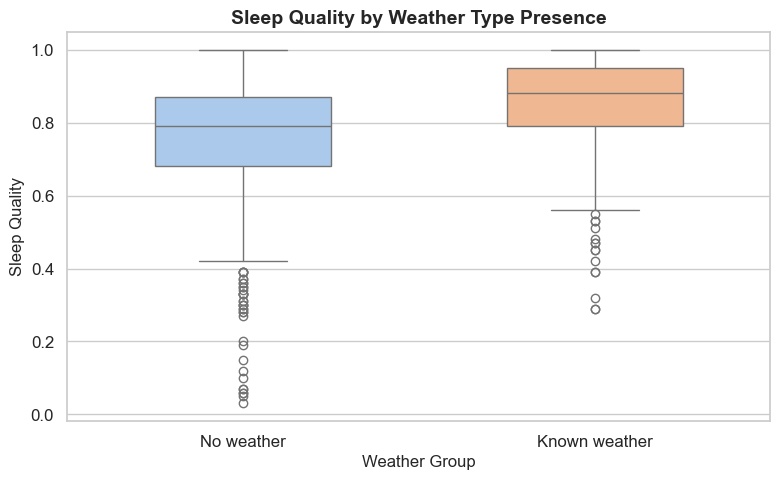

In [6]:
# Combine the groups into one DataFrame
plot_df = pd.concat([
    pd.DataFrame({'Sleep Quality': sleep_a, 'Group': 'No weather'}),
    pd.DataFrame({'Sleep Quality': sleep_b, 'Group': 'Known weather'})
])

# Set modern style
sns.set(style="whitegrid", font_scale=1.1)

# Plot using hue and suppress legend to avoid deprecation warning
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=plot_df,
    x='Group',
    y='Sleep Quality',
    hue='Group',
    palette="pastel",
    width=0.5,
    dodge=False,
    legend=False  # No legend needed
)

# Set titles and labels
ax.set_title('Sleep Quality by Weather Type Presence', fontsize=14, weight='bold')
ax.set_xlabel('Weather Group', fontsize=12)
ax.set_ylabel('Sleep Quality', fontsize=12)

plt.tight_layout()
plt.show()

### ✅ F. Assumption Checks

- Before choosing a statistical test, we check:
	- Normality of each group (using Shapiro-Wilk test)
	- Equality of variances between groups (using Levene’s test)


In [9]:
# Test for normality in Group A (No weather)
stat_a, p_a = shapiro(sleep_a)
print(f"Group A (No weather) - Shapiro p-value: {p_a:.4f}")

# Test for normality in Group B (Known weather)
stat_b, p_b = shapiro(sleep_b)
print(f"Group B (Known weather) - Shapiro p-value: {p_b:.4f}")

Group A (No weather) - Shapiro p-value: 0.0000
Group B (Known weather) - Shapiro p-value: 0.0000


### ✅ F.1 Run the Mann-Whitney U Test

- Since the data is not normal, we’ll use a Mann-Whitney U test.
- This test compares whether one group tends to have higher values than the other, without assuming normality.

In [ ]:
# Run Mann-Whitney U test to compare Sleep Quality between the two groups
stat, p = mannwhitneyu(sleep_a, sleep_b, alternative='two-sided')

# Print the p-value
print(f"Mann-Whitney U test p-value: {p:.4f}")

### 📊 G.  Results – Mann-Whitney U Test

- **Test Used**: Mann-Whitney U Test (non-parametric)
- **p-value**: 0.000
- **Conclusion**: We **reject the null hypothesis** (H₀). There is a **statistically significant difference** in sleep quality between days with `"No weather"` and days with known weather types.

🎯 This means the presence or absence of weather data is likely connected to how restful sleep is.

In [ ]:
# Check if the result is statistically significant
if p < 0.05:
    print("✅ Statistically significant difference: Reject the null hypothesis (H₀)")
else:
    print("❌ No statistically significant difference: Fail to reject the null hypothesis (H₀)")

### 📐 Step 9.5 – Effect Size with Cliff’s Delta

After finding a statistically significant result using the Mann-Whitney U test (p-value = 0.000), we wanted to understand **how strong that difference is** in practical terms — not just whether it exists.

While p-values tell us if the difference is likely real, they **don’t tell us how big** or meaningful the difference is. That’s where **effect size** comes in.

#### 🧪 What is Cliff’s Delta?

Cliff’s Delta is a **non-parametric effect size measure** that tells us how often values in one group are higher than the other, without assuming normal distribution.

- It ranges from **-1 to 1**:
  - `0` → groups are ranked the same
  - `-1` → Group B always ranks higher
  - `1` → Group A always ranks higher

#### 🧠 Why We Used It

Since our data failed the normality test and we used the Mann-Whitney U test, **Cliff’s Delta is the appropriate effect size metric** — it works even when the data isn't normally distributed and focuses on **ranked differences**, not just mean differences.

---

#### 📊 Result

- **Cliff’s Delta**: `-0.366`
- **Effect Magnitude**: Medium

✅ This means that sleep quality in the **"Known weather"** group tends to be **meaningfully higher** than in the **"No weather"** group.  
It's not just statistically significant — the difference is large enough to matter in the real world.

---

> 🔍 This strengthens our conclusion that **missing weather data is associated with lower sleep quality**, potentially due to poor environmental conditions or data quality issues.

In [10]:
from itertools import product

# Assume you already have two Series: sleep_a and sleep_b

# Count all pairwise comparisons
greater = 0
less = 0
equal = 0

for a, b in product(sleep_a, sleep_b):
    if a > b:
        greater += 1
    elif a < b:
        less += 1
    else:
        equal += 1

# Calculate Cliff's Delta
n_a = len(sleep_a)
n_b = len(sleep_b)
delta = (greater - less) / (n_a * n_b)

# Interpret the effect size
abs_delta = abs(delta)
if abs_delta < 0.147:
    magnitude = "negligible"
elif abs_delta < 0.33:
    magnitude = "small"
elif abs_delta < 0.474:
    magnitude = "medium"
else:
    magnitude = "large"

print(f"Cliff’s Delta = {delta:.3f} → {magnitude} effect")

Cliff’s Delta = -0.366 → medium effect


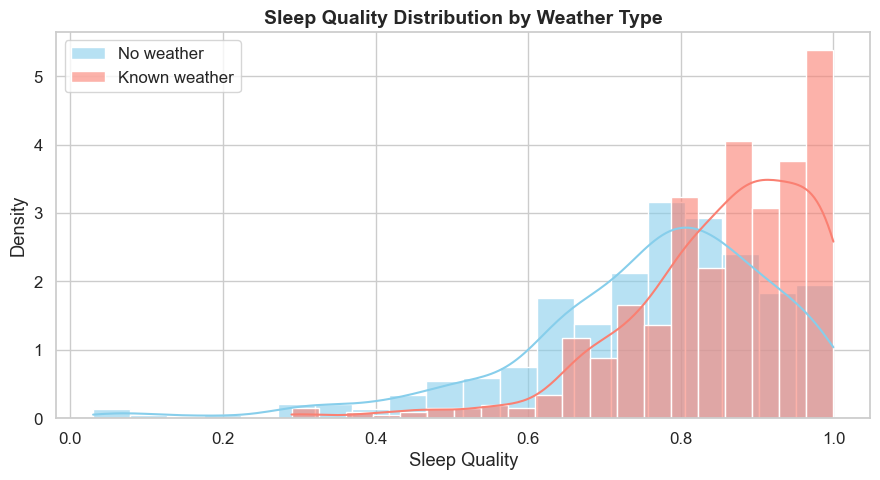

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine into one plot
plt.figure(figsize=(9, 5))

sns.histplot(sleep_a, color="skyblue", label="No weather", kde=True, stat="density", bins=20, alpha=0.6)
sns.histplot(sleep_b, color="salmon", label="Known weather", kde=True, stat="density", bins=20, alpha=0.6)

plt.title("Sleep Quality Distribution by Weather Type", fontsize=14, weight='bold')
plt.xlabel("Sleep Quality")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

### 🧩 H. Interpretation – What Does It Mean?

The result strongly suggests that sleep quality **differs when weather data is recorded** versus when it is missing.

This could indicate:
- Environmental factors (like rain, temperature, humidity) may actually influence sleep
- Or that `"No weather"` represents **gaps or inconsistencies** in data collection — possibly affecting sleep tracking accuracy